LAB: Visualización de datos usando Matplotlib
==========================================

In [1]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
%matplotlib inline

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


In [2]:
datos = pandas.read_csv('indicadores-mundiales.csv',encoding='latin-1')
region_poblacion = datos.groupby('Region').sum()[['Poblacion 0-14','Poblacion 15-64', 'Poblacion 65+',]]/100
datos['fecha'] = pandas.to_datetime(datos['Ano'])
region_gasto = datos.groupby([datos['fecha'].dt.year,'Region']).mean()[['Gasto en salud (per capita)',
                                                               'Poblacion 0-14','Poblacion 15-64', 'Poblacion 65+']]


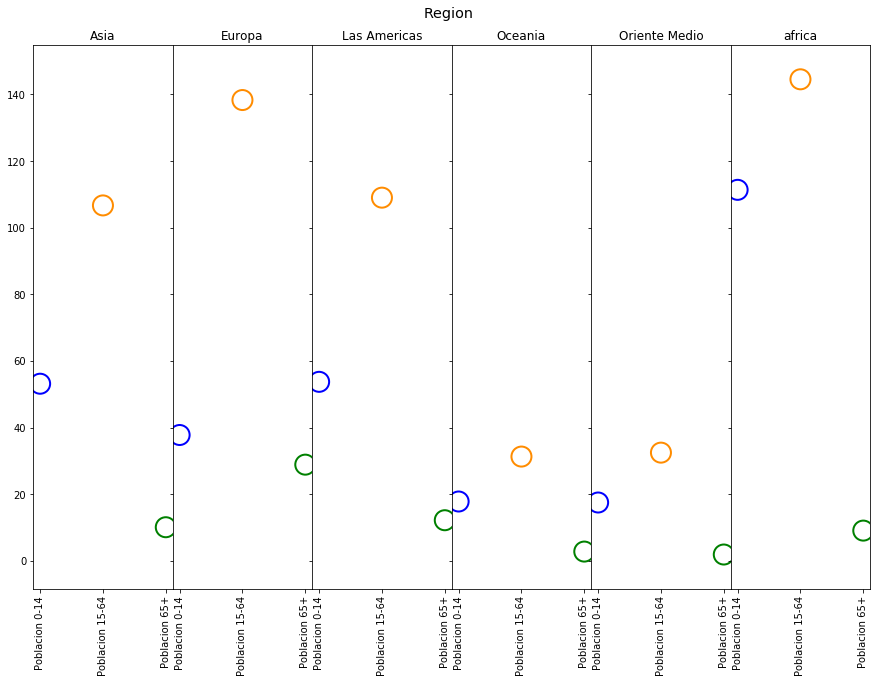

In [3]:
fig, axs = plt.subplots(1,6,sharey=True,figsize=(15,10))

# Iterador de graficas
for i,x in enumerate(axs):
    
    axs[i].scatter(list(region_poblacion.keys()),
                   region_poblacion.T[region_poblacion.index[i]],
                   edgecolor=['blue','darkorange','green'],
                   marker='o',
                   s=400, 
                   color = ['white']*3,
                   linewidths=2,
                  )
    axs[i].set_xticklabels(list(region_poblacion.keys()),rotation='vertical')
    axs[i].set_title(region_poblacion.index[i]);
    
# Ajustes
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.text(-5,163,'Region',size='x-large');

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


Text(-7, 160, 'Region')

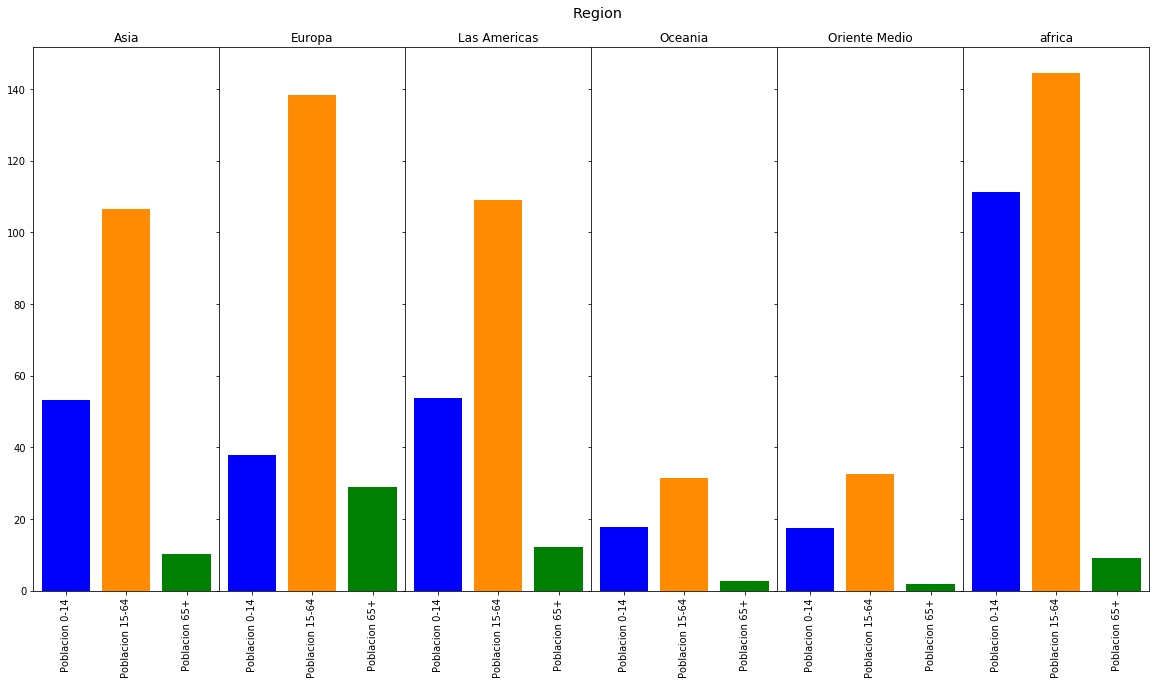

In [4]:
fig, axs = plt.subplots(1,6,sharey=True,figsize=(20,10))

# Iterador de graficas
for i,x in enumerate(axs):
    
    axs[i].bar(list(region_poblacion.keys()), 
               region_poblacion.T[region_poblacion.index[i]],
               color=['blue','darkorange','green'] 
              )
    axs[i].set_xticklabels(list(region_poblacion.keys()),rotation='vertical')
    axs[i].set_title(region_poblacion.index[i]); 
    
# Ajustes
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.text(-7,160,'Region',size='x-large')

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

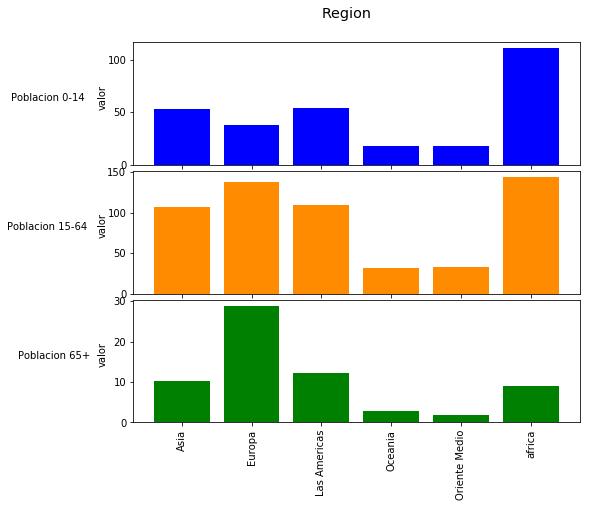

In [5]:
# Contenedores
fig, axs = plt.subplots(3,1,sharex=True,figsize=(8,7))

# Parametros
colores=['blue','darkorange','green']
posicion = [68,90,18]
ticks=[[0,50,100],[0,50,100,150],[0,10,20,30]] 

# Iterador de graficas
for i,x in enumerate(axs):
    
    axs[i].bar(region_poblacion.index,
               region_poblacion[list(region_poblacion.keys())[i]], 
               color=colores[i]
              )
    axs[i].set_xticklabels(region_poblacion.index,rotation='vertical')
    axs[i].set_yticks(ticks[i])
    axs[i].text(-1.2,posicion[i],'valor',rotation='vertical')
    axs[i].set_ylabel(region_poblacion.keys()[i],rotation='horizontal',labelpad=60);
    
# Ajustes
    
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.text(2,100,'Region',size='x-large');

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

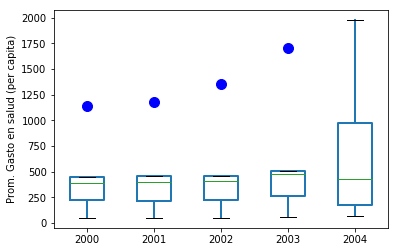

In [6]:
# Parametros del boxplot
puntos = dict(marker='o', markerfacecolor='b', markersize=10,
              linestyle='none', markeredgecolor='b',
             ) 
cajas = dict(linewidth=2, color='black')
bigotes = dict(linewidth=2, linestyle='solid', color='black')
media = dict(color='black', linewidth=10) 

# Grafica
region_gasto['Gasto en salud (per capita)'].unstack().T.boxplot(grid=False,
                                                         flierprops=puntos,
                                                         boxprops = cajas,
                                                         whiskerprops = bigotes, 
                                                         meanprops = media, 
                                                        )

plt.ylabel('Prom. Gasto en salud (per capita)');

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

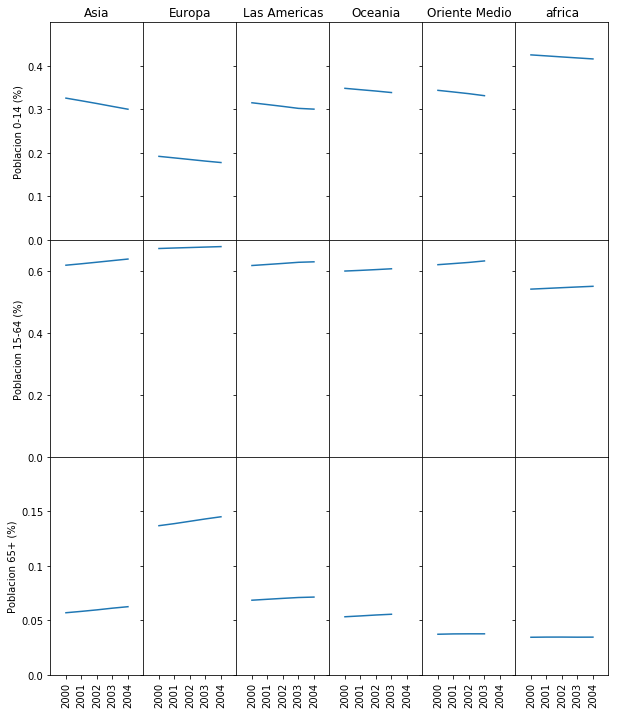

In [7]:
# Parametros iniciales
ticks2= [[0.0, 0.1, 0.2, 0.3,0.4], [0.0, 0.2, 0.4, 0.6], [0.0, 0.05, 0.1, 0.15],]
limites = [[0,0.5],[0,0.7],[0,0.2]]

# Contenedor
fig, axs = plt.subplots(3,6,sharex='col',sharey='row',figsize=(10,12))
plt.subplots_adjust(wspace=0, hspace=0)

# Iterador
for i,pobl in enumerate(region_gasto.keys()[1:]):
    
    for j,reg in enumerate(region_gasto.unstack()['Poblacion 0-14'].keys()):
        
        axs[i,j].plot(region_gasto.unstack()[pobl][reg]/100) 
        axs[2,j].set_xbound(1999,2005)
        axs[i,0].set_ybound(limites[i])
        axs[2,j].set_xticks([2000,2001,2002,2003,2004]) 
        axs[2,j].set_xticklabels(list(range(2000,2005,1)),rotation='vertical')
        axs[0,j].set_title(reg) 
        axs[i,0].set_yticks(ticks2[i]) 
        axs[i,0].set_yticklabels(ticks2[i])
        axs[i,0].set_ylabel(pobl + ' (%)')

---